# Datos sin Cartagena
En la sala de Cartagena, a diferencia del resto, habían dos unidades de aire acondicionado y una de estas estaba mala. Esta posiblemente sea la razón por la que los votos en esta ciudad sean muy raros, tal como se ve al final del notebook "Adaptab_python2"

Debido a esto, se repetirán análisis hechos en los dos cuadernos anteriores y se complementará con gráficos de los votos de Preferencia.

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path=("/Users/alejandronaranjo/OneDrive - Universidad de San Buenaventura Medellín/03. Investigación/08 Inv. Adaptabilidad/06 Python_adaptab/01 Datos")
os.listdir(path)
os.chdir(path)

In [3]:
datos = pd.read_csv("sensac_pref_orig.csv")
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1631 non-null   int64  
 1   Ciudad              1630 non-null   object 
 2   genero              1624 non-null   object 
 3   edad                1630 non-null   float64
 4   P1.1                1630 non-null   float64
 5   P6 bien             1630 non-null   float64
 6   P2.1                1630 non-null   float64
 7   P7 bien             1630 non-null   float64
 8   Rango_EH_media      1630 non-null   float64
 9   Rango_EV_media      1630 non-null   float64
 10  TEMP                1630 non-null   float64
 11  HUMEDAD             1630 non-null   float64
 12  sens_vis_term_orig  1631 non-null   object 
 13  pref_vis_term_orig  1631 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 178.5+ KB


In [4]:
# Como eco del cuaderno anterior, repetiré pasos iniciales donde se crea
# DF "datos2" y luego crearé el q necesito como base para hacer
# lo q se pretende en este cuadeno.

# 1) Aprovecharé para eliminar dos columnas que no tienen sentido dentro
#    de Python (funcionaban cuando estaba trabajando en Excel)

datos2 = datos.drop(columns=["sens_vis_term_orig",
                        "pref_vis_term_orig"])
del datos2 ["Unnamed: 0"]

# 2) Después de haber generado gráficos más abajo, encontré algo q no había
#    visto y es q hay 6 votos para los q no se ha asignado género,
#    por tanto se eliminarán estas filas

datos2 = datos2.dropna()
datos2 = datos2.reset_index()
del datos2 ["index"]
datos2
#datos2.info()

,Ciudad,genero,edad,P1.1,P6 bien,P2.1,P7 bien,Rango_EH_media,Rango_EV_media,TEMP,HUMEDAD
0,Cartagena,F,26.0,-1.0,1.0,1.0,-1.0,1.0,1.0,28.5,50.2
1,Cartagena,F,26.0,2.0,1.0,1.0,-2.0,1.0,1.0,28.9,51.1
2,Cartagena,F,26.0,0.0,1.0,2.0,-1.0,1.0,1.0,28.7,50.8
3,Cartagena,F,26.0,-1.0,1.0,1.0,-1.0,1.0,1.0,29.0,51.8
4,Cartagena,F,26.0,-1.0,1.0,1.0,-1.0,1.0,1.0,28.9,52.1
...,...,...,...,...,...,...,...,...,...,...,...
1619,Medellín,M,21.0,-1.0,1.0,2.0,-2.0,1.0,1.0,26.5,66.1
1620,Medellín,M,20.0,0.0,1.0,0.0,-1.0,1.0,1.0,27.1,67.8
1621,Medellín,M,20.0,0.0,0.0,0.0,0.0,1.0,1.0,26.7,68.9
1622,Medellín,M,20.0,0.0,0.0,0.0,-1.0,1.0,1.0,26.5,68.6


In [5]:
#Renombraré votos
datos2 = datos2.rename(columns={"P1.1":"SensaciónVisual",
                              "P6 bien":"SensaciónTérmica",
                              "P2.1":"PreferenciaVisual",
                              "P7 bien":"PreferenciaTérmica"})

#esto es pq al renombrar columnas se generaba una columna adicional
#del datos2["Unnamed: 0"]
datos2

,Ciudad,genero,edad,SensaciónVisual,SensaciónTérmica,PreferenciaVisual,PreferenciaTérmica,Rango_EH_media,Rango_EV_media,TEMP,HUMEDAD
0,Cartagena,F,26.0,-1.0,1.0,1.0,-1.0,1.0,1.0,28.5,50.2
1,Cartagena,F,26.0,2.0,1.0,1.0,-2.0,1.0,1.0,28.9,51.1
2,Cartagena,F,26.0,0.0,1.0,2.0,-1.0,1.0,1.0,28.7,50.8
3,Cartagena,F,26.0,-1.0,1.0,1.0,-1.0,1.0,1.0,29.0,51.8
4,Cartagena,F,26.0,-1.0,1.0,1.0,-1.0,1.0,1.0,28.9,52.1
...,...,...,...,...,...,...,...,...,...,...,...
1619,Medellín,M,21.0,-1.0,1.0,2.0,-2.0,1.0,1.0,26.5,66.1
1620,Medellín,M,20.0,0.0,1.0,0.0,-1.0,1.0,1.0,27.1,67.8
1621,Medellín,M,20.0,0.0,0.0,0.0,0.0,1.0,1.0,26.7,68.9
1622,Medellín,M,20.0,0.0,0.0,0.0,-1.0,1.0,1.0,26.5,68.6


In [6]:
# Crearé DF sin datos de Cartagena

datos_sincar = datos2.loc[datos2["Ciudad"]!= "Cartagena"]
datos_sincar

datos_sincar = datos_sincar.reset_index()
del datos_sincar ["index"]
datos_sincar

#datos_m = datos2.loc[datos2["genero"]=="M"]
#datos_m.info()

,Ciudad,genero,edad,SensaciónVisual,SensaciónTérmica,PreferenciaVisual,PreferenciaTérmica,Rango_EH_media,Rango_EV_media,TEMP,HUMEDAD
0,Armenia,F,23.0,2.0,2.0,-1.0,-2.0,3.0,4.0,28.9,50.2
1,Armenia,F,23.0,2.0,2.0,-1.0,-2.0,3.0,4.0,29.1,50.2
2,Armenia,F,23.0,1.0,2.0,-1.0,-2.0,2.0,4.0,29.2,50.7
3,Armenia,F,23.0,1.0,1.0,0.0,-1.0,2.0,4.0,29.4,50.0
4,Armenia,M,20.0,0.0,3.0,1.0,-1.0,2.0,2.0,28.9,50.2
...,...,...,...,...,...,...,...,...,...,...,...
1139,Medellín,M,21.0,-1.0,1.0,2.0,-2.0,1.0,1.0,26.5,66.1
1140,Medellín,M,20.0,0.0,1.0,0.0,-1.0,1.0,1.0,27.1,67.8
1141,Medellín,M,20.0,0.0,0.0,0.0,0.0,1.0,1.0,26.7,68.9
1142,Medellín,M,20.0,0.0,0.0,0.0,-1.0,1.0,1.0,26.5,68.6


# Limpieza adicional
En función de gráficos generados más abajo, encontré un par de datos en votos de preferencia que eran "extremos / atípicos / q iban en contra de tendencias" en Manizales y Armenia, tal como se ve en el siguiente gráfico:

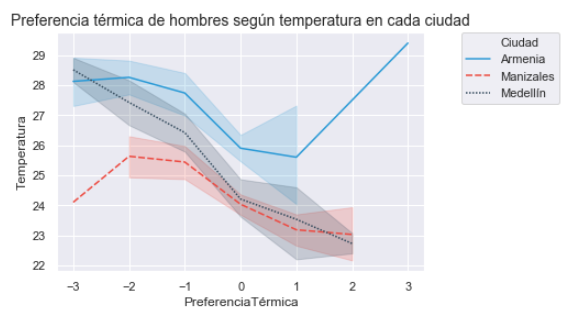

Incluso más adelante, encontré que era en votos de hombres y no de mujeres:

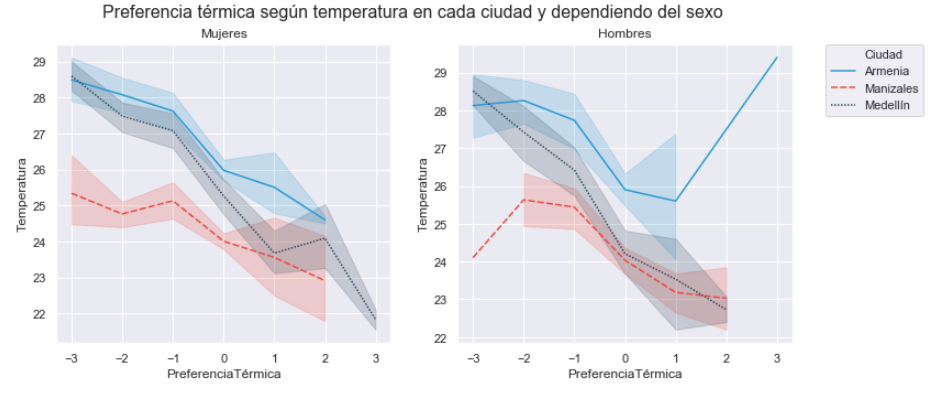

In [7]:
# Aquí elimino el dato de Preferencia = -3, de un hombre en Manizales
# localizo el index de la fila q cumple con la condición específica
i = datos_sincar[((datos_sincar.PreferenciaTérmica == -3)
                  &(datos_sincar.Ciudad == "Manizales")
                 &(datos_sincar.genero == "M"))].index
i

datos_sincar = datos_sincar.drop(i)
datos_sincar
# el DF se reduce de 1144 filas a 1143

# Ahora elimino el dato de Preferencia = 3, de un hombre en Armenia
# localizo el index de la fila q cumple con la condición específica
i = datos_sincar[((datos_sincar.PreferenciaTérmica == 3)
                  &(datos_sincar.Ciudad == "Armenia")
                 &(datos_sincar.genero == "M"))].index
i

datos_sincar = datos_sincar.drop(i)
datos_sincar
# el DF se reduce de 1143 filas a 1142

datos_sincar = datos_sincar.reset_index()
del datos_sincar ["index"]
datos_sincar

,Ciudad,genero,edad,SensaciónVisual,SensaciónTérmica,PreferenciaVisual,PreferenciaTérmica,Rango_EH_media,Rango_EV_media,TEMP,HUMEDAD
0,Armenia,F,23.0,2.0,2.0,-1.0,-2.0,3.0,4.0,28.9,50.2
1,Armenia,F,23.0,2.0,2.0,-1.0,-2.0,3.0,4.0,29.1,50.2
2,Armenia,F,23.0,1.0,2.0,-1.0,-2.0,2.0,4.0,29.2,50.7
3,Armenia,F,23.0,1.0,1.0,0.0,-1.0,2.0,4.0,29.4,50.0
4,Armenia,M,20.0,0.0,3.0,1.0,-1.0,2.0,2.0,28.9,50.2
...,...,...,...,...,...,...,...,...,...,...,...
1137,Medellín,M,21.0,-1.0,1.0,2.0,-2.0,1.0,1.0,26.5,66.1
1138,Medellín,M,20.0,0.0,1.0,0.0,-1.0,1.0,1.0,27.1,67.8
1139,Medellín,M,20.0,0.0,0.0,0.0,0.0,1.0,1.0,26.7,68.9
1140,Medellín,M,20.0,0.0,0.0,0.0,-1.0,1.0,1.0,26.5,68.6


Armenia      394
Medellín     382
Manizales    366
Name: Ciudad, dtype: int64

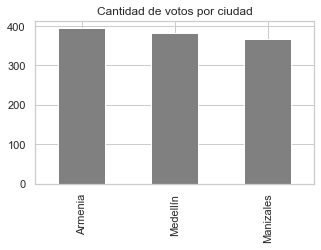

In [8]:
sns.set(style="whitegrid")

datos_sincar['Ciudad'].value_counts().plot(kind="bar",
                                    figsize=(5,3),
                                    title="Cantidad de votos por ciudad",
                                    color="grey")


datos_sincar['Ciudad'].value_counts()

F    712
M    430
Name: genero, dtype: int64

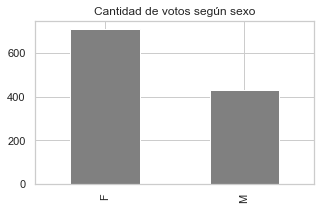

In [9]:
datos_sincar['genero'].value_counts().plot(kind="bar",
                                    figsize=(5,3),
                                    title="Cantidad de votos según sexo",
                                    color="grey")

datos_sincar['genero'].value_counts()

21.0    212
20.0    163
19.0    157
22.0    144
23.0    111
18.0     88
24.0     63
25.0     60
17.0     56
26.0     43
30.0     12
28.0      9
16.0      9
2.0       5
29.0      5
36.0      5
Name: edad, dtype: int64

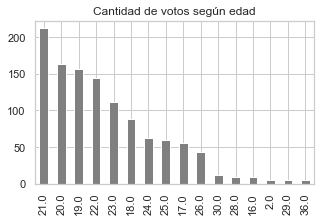

In [10]:
datos_sincar["edad"].value_counts().plot(kind="bar",
                                    figsize=(5,3),
                                    title="Cantidad de votos según edad",
                                    color="grey")

datos_sincar['edad'].value_counts()

In [11]:
pivot_sexo_sincar = datos_sincar.pivot_table(index='genero',
                                        columns='SensaciónTérmica',
                                        values='TEMP',
                                        #aggfunc='mean')
                                        #aggfunc='min')    
                                        aggfunc='count')
pivot_sexo_sincar

# no tiene mucho sentido usar MAX o MIN
# es posible q la relación entre votos con temperatura esté errada

SensaciónTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
genero,,,,,,,
F,12.0,50.0,77.0,383.0,94.0,64.0,32.0
M,NaN,23.0,60.0,222.0,69.0,42.0,14.0


In [12]:
sens_vis_ter_sincar = datos_sincar.pivot_table(index='SensaciónVisual',
                                        columns='SensaciónTérmica',
                                        values='TEMP',
                                        aggfunc='count')
sens_vis_ter_sincar

# Si quisiera pivotar con más valores, puedo indicarlo de la siguiente manera
# ('SensaciónTérmica',"PreferenciaTérmica"),

SensaciónTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
SensaciónVisual,,,,,,,
-2.0,1.0,4.0,3.0,15.0,3.0,5.0,NaN
-1.0,5.0,32.0,46.0,155.0,45.0,25.0,9.0
0.0,1.0,29.0,67.0,352.0,82.0,43.0,22.0
1.0,4.0,6.0,18.0,66.0,28.0,25.0,10.0
2.0,1.0,2.0,3.0,17.0,5.0,8.0,5.0


In [13]:
# Esto me ayuda a saber qué pasa a grandes rasgos en cada serie
# según el sexo

datos_sincar.groupby("genero").count()

,Ciudad,edad,SensaciónVisual,SensaciónTérmica,PreferenciaVisual,PreferenciaTérmica,Rango_EH_media,Rango_EV_media,TEMP,HUMEDAD
genero,,,,,,,,,,
F,712,712,712,712,712,712,712,712,712,712
M,430,430,430,430,430,430,430,430,430,430


In [14]:
datos_sincar.groupby("genero").mean()

,edad,SensaciónVisual,SensaciónTérmica,PreferenciaVisual,PreferenciaTérmica,Rango_EH_media,Rango_EV_media,TEMP,HUMEDAD
genero,,,,,,,,,
F,20.577247,-0.113764,0.147472,0.601124,-0.500000,2.431180,2.316011,25.734129,63.050562
M,22.144186,-0.137209,0.206977,0.539535,-0.660465,2.593023,2.444186,25.623023,63.127209


In [15]:
datos_sincar.groupby("genero").median()

,edad,SensaciónVisual,SensaciónTérmica,PreferenciaVisual,PreferenciaTérmica,Rango_EH_media,Rango_EV_media,TEMP,HUMEDAD
genero,,,,,,,,,
F,21.0,0.0,0.0,0.0,0.0,2.0,2.0,25.5,63.2
M,22.0,0.0,0.0,1.0,-0.5,2.0,2.0,25.2,62.6


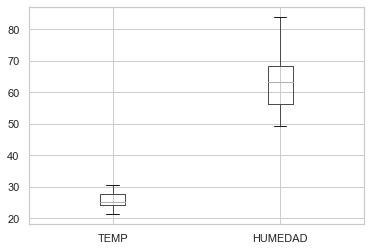

In [16]:
datos_sincar[['TEMP','HUMEDAD']].boxplot()

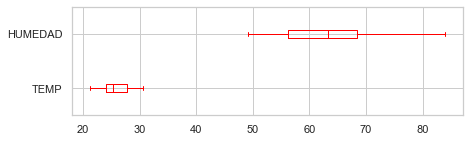

In [17]:
datos_sincar[['TEMP','HUMEDAD']].plot.box(color="red",
                                   sym='r+', figsize=(7,2),
                                   vert=False)

Armenia           AxesSubplot(0.1,0.559091;0.363636x0.340909)
Manizales    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Medellín              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

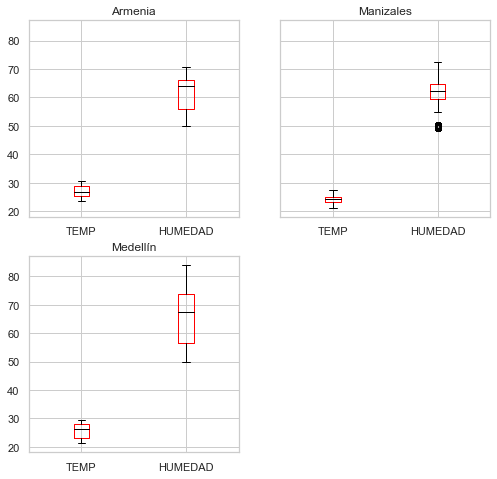

In [18]:
color = {'boxes': 'red', 'whiskers': "black",  'medians': 'Black', 'caps': 'black'}

datos_sincar[['TEMP','HUMEDAD','Ciudad']].groupby('Ciudad').boxplot(color=color, figsize=(8,8))

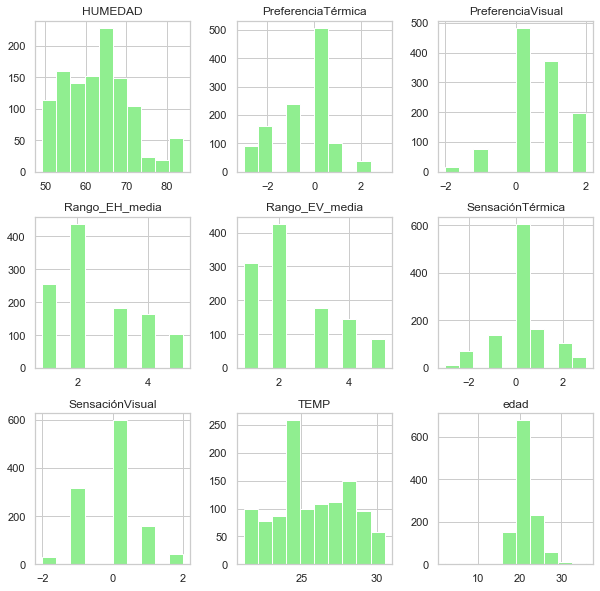

In [19]:
datos_sincar.hist(figsize=(10,10), color="LightGreen");

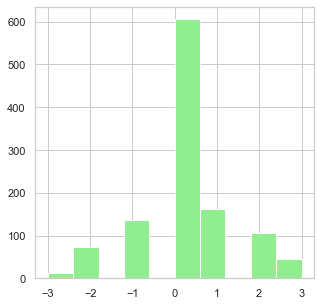

In [20]:
datos_sincar["SensaciónTérmica"].hist(figsize=(5,5),
                               color="LightGreen")

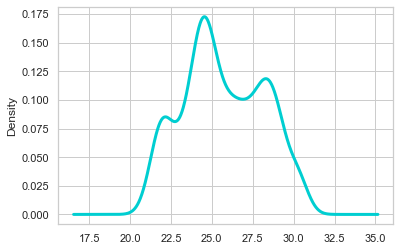

In [21]:
datos_sincar['TEMP'].plot.kde(color="darkturquoise", lw=3)

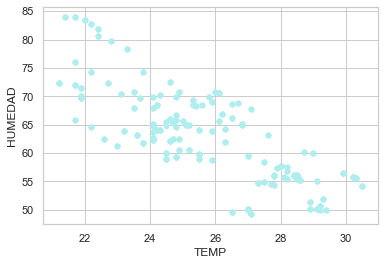

In [22]:
datos_sincar.plot.scatter(x='TEMP', y='HUMEDAD', color="paleturquoise")

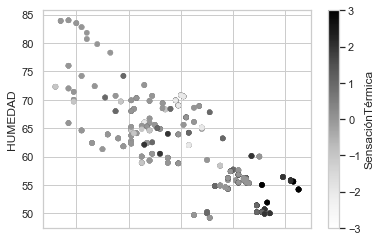

In [23]:
datos_sincar.plot.scatter(x='TEMP', y='HUMEDAD', c="SensaciónTérmica",
                   )

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1742: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


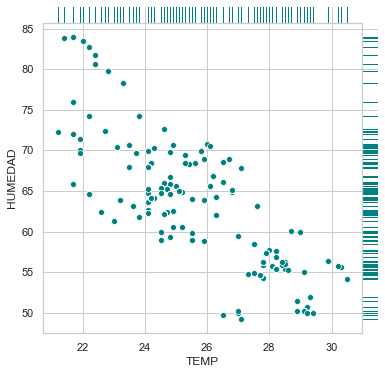

In [24]:
#flatui = ["aquamarine", "black", "dimgray"]

x=datos_sincar["TEMP"]
y=datos_sincar['HUMEDAD']

grid = sns.JointGrid(x, y, space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="teal")
grid.plot_marginals(sns.rugplot, height=1, color="teal")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

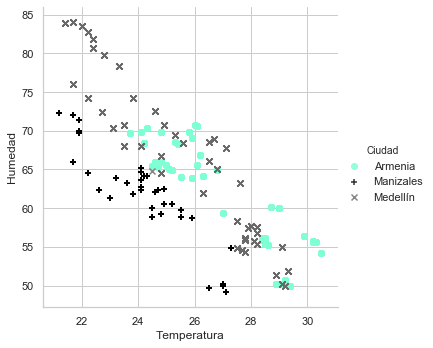

In [25]:
#sns.set(style="whitegrid")

palette = ["aquamarine", "black", "dimgray"]

sns.lmplot(x="TEMP", y="HUMEDAD", data=datos_sincar,
           fit_reg=False, hue='Ciudad', legend=True,
          palette=palette, markers=["o", "+", "x"])
 
#plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

sns.set(font_scale=1.4)

plt.xlabel("Temperatura")
plt.ylabel("Humedad")

#plt.savefig('TempHumed_Ciudades.png', transparent=False, dpi=300)
plt.savefig('TempHumed_Ciudades.eps', format='eps',  transparent=True, dpi=300)

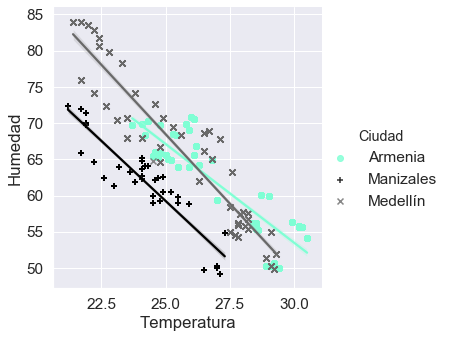

In [28]:
#sns.set(style="whitegrid")

palette = ["aquamarine", "black", "dimgray"]

sns.lmplot(x="TEMP", y="HUMEDAD", data=datos_sincar,
           fit_reg=True, hue='Ciudad', legend=True,
          palette=palette, markers=["o", "+", "x"])
 
#plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

sns.set(font_scale=1.4)

plt.xlabel("Temperatura")
plt.ylabel("Humedad")

plt.savefig('TempHumed_Ciudades.png', transparent=False, dpi=300)

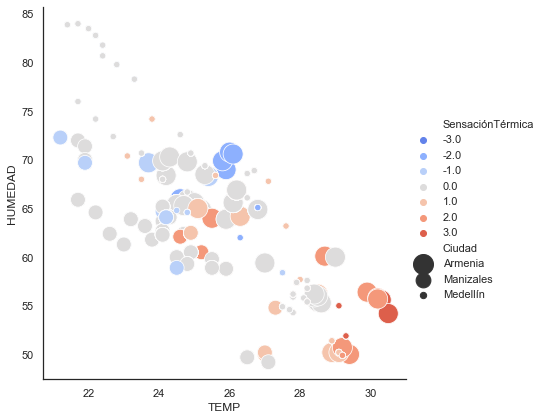

In [34]:
sns.set(style="white")

#palette=sns.cubehelix_palette(7, start=1, rot=-.75)
flatui = ["#9b59b6", "#3498db", "#95a5a6", 
          "#e74c3c", "#34495e", "#2ecc71", "grey"]
 
             #palette=palette,
             #palette="GnBu_d",
             #palette="RdBu_r",
             #palette="husl",
             #palette="hls",
             #palette=flatui,

sns.relplot(x="TEMP", y="HUMEDAD", hue="SensaciónTérmica", size="Ciudad",
            sizes=(40, 400), alpha=1, palette=sns.color_palette("coolwarm", 7), #palette=flatui,
            height=6, data=datos_sincar) #, markers= ["v", "v", "v", "o", "^", "^", "^"])


In [25]:
from pandas.plotting import scatter_matrix

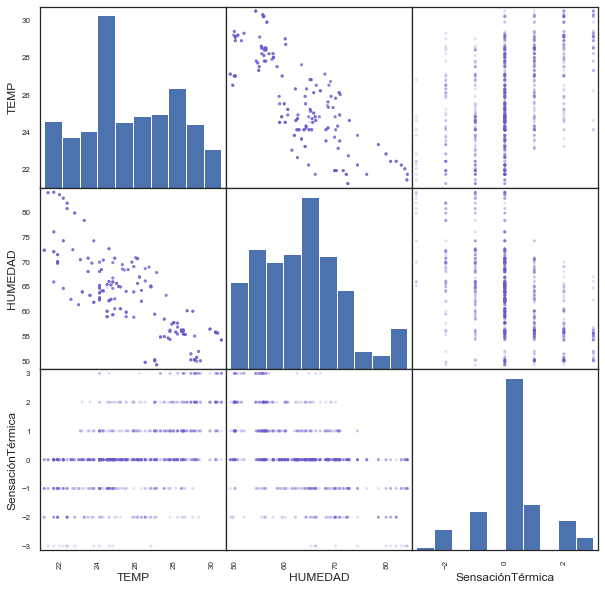

In [26]:
scatter_matrix(datos_sincar[['TEMP','HUMEDAD','SensaciónTérmica']],
               alpha=0.2, figsize=(10,10), diagonal='hist', color="slateblue");

In [99]:
from pandas.plotting import parallel_coordinates

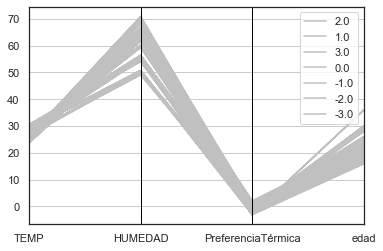

In [100]:
#datos[['TEMP','HUMEDAD','SensaciónTérmica','Air velocity (m/s)']].iloc[:500].info()
parallel_coordinates(datos_sincar[['TEMP','HUMEDAD',
                               'SensaciónTérmica',
                               'PreferenciaTérmica',
                           "edad",
                           ]].iloc[:500],
                     'SensaciónTérmica', color="silver");

Text(0.5, 0.98, 'Sensación y preferencia térmica en todas las ciudades')

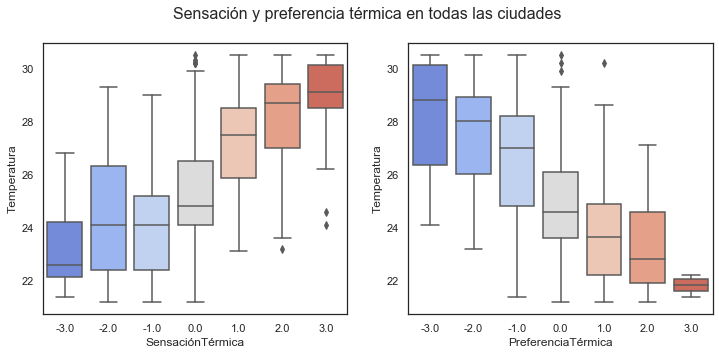

In [28]:
fig_1 = plt.figure(1, figsize=(12,5))

#configuro base del gráfico con sus respectivas variaciones:
chart_1 = fig_1.add_subplot(121) #1 (significa una línea), 2 (#columnas), 1(en cuál columna va) 
plt.xlabel("Sensación Térmica")

#Datos q se plotean dentro de ese gráfico
chart_1 = sns.boxplot(x="SensaciónTérmica", y="TEMP", 
             palette=sns.color_palette("coolwarm", 7),
             data=datos_sincar)
plt.ylabel("Temperatura")

chart_2 = fig_1.add_subplot(122)
plt.xlabel("Preferencia Térmica")
          
chart_2 = sns.boxplot(x="PreferenciaTérmica", y="TEMP",
             palette=sns.color_palette("coolwarm", 7),
             data=datos_sincar)
plt.ylabel("Temperatura")

plt.suptitle("Sensación y preferencia térmica en todas las ciudades", fontsize=16)

# *Análisis*

* *Al visualizar los datos de todas las ciudades juntos, se observa como en temperaturas comparativamente bajas entre ellas, la sensación tiende a votos de "muy frío" (-3) y la preferencia a votos de "mucho más caliente" (+3); por el contrario, cuando la temperatura aumenta, la sensación tiende a ser "muy caliente" (+3) y la preferencia se desplaza a "mucho más frío" (-3)*

* *Considerando las diferencias climáticas entre las 3 ciudades analizadas, conviene hacer una diferenciación entre cada una de ellas.*



### Jugando a cambiar estilos de textos en Markdown
<font color='grey'>
Así sería si quisiera cambiar el color del texto
</font>

*These are italicized words, not a bullet list*

**These are bold words, not a bullet list**

* **This is a bullet item with bold words**
* *This is a bullet item with italicized words*

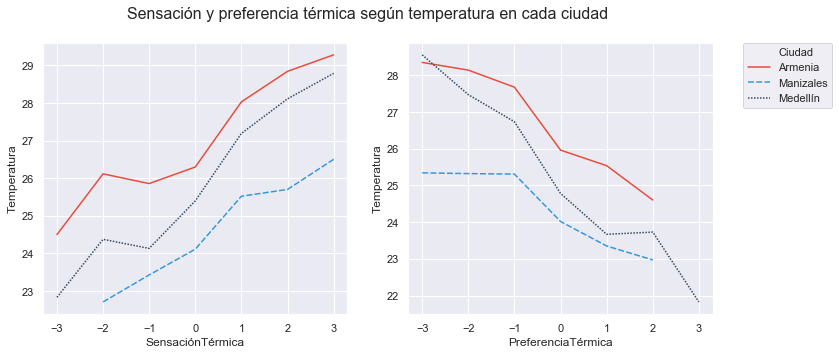

In [82]:
sns.set(style="darkgrid")
#sns.set(style="whitegrid")

fig_1 = plt.figure(1, figsize=(12,5))
flatui = ["#e74c3c", "#3498db", "#34495e"]

#configuro base del gráfico con sus respectivas variaciones:
chart_1 = fig_1.add_subplot(121) #1 (significa una línea), 2 (#columnas), 1(en cuál columna va) 
#plt.title("Sensación")
plt.xlabel("Sensación Térmica")


#Datos q se plotean dentro de ese gráfico
chart_1 = sns.lineplot(x="SensaciónTérmica", y="TEMP",
             hue="Ciudad", style="Ciudad", 
             palette=flatui, ci=None,  
             data=datos_sincar, legend=False)
plt.ylabel("Temperatura")

# "ci" controla si se muestra o no la Desviación Estandar, y en caso de mostrarse,
# cómo la muestro. Opto por no mostrarla para no enredarme mucho

chart_2 = fig_1.add_subplot(122)
#plt.title("Preferencia")
plt.xlabel("Preferencia Térmica")
          
chart_2 = sns.lineplot(x="PreferenciaTérmica", y="TEMP",
             hue="Ciudad", style="Ciudad", 
             palette=flatui, ci=None,
             data=datos_sincar)
plt.ylabel("Temperatura")

plt.suptitle("Sensación y preferencia térmica según temperatura en cada ciudad", fontsize=16)

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

# En el gráfico de la derecha se pueden ver un par de diferencias
# con relación al q se mostró antes de eliminar valores 

# *Análisis*

* *Al analizar el comportamiento de la sensación y preferencia térmica en cada una de las ciudades, se evidencia claramente el efecto de la adaptación del ser humano a las condiciones climáticas del lugar en que habita. Es así como un mismo valor de temperatura, se interpreta diferente en términos de sensación y preferencia en cada una de las ciudades.*

* *Como ilustración de lo anteriormente expuesto, se puede ver como cuando la temperatura ronda los 25ºC, la sensación térmica en Armenia es "muy fría" (-3), en Medellín está cercana a percibirse como "agradable" (0) tendiendo a "ligeramente fría" (-1), y en Manizales a sentirse agradable con tendencia hacia  "ligeramente caliente" (+1); por el contrario, con ese mismo valor, la preferencia en Manizales se desplaza hacia temperaturas más bajas (-1, -2 y -3), en Medellín se puede mantener en el mismo valor (0) y en Armenia prefieren mayores temperaturas (+2)*




In [78]:
# Con el fin de entender qué está ploteándose en esos gráficos,
# procedo a hacer el siguiente análisis... en este caso con los votos
# de Sensación iguales a -2:

armenia = datos_sincar.loc[datos_sincar["Ciudad"]== "Armenia"]
armenia = armenia[["Ciudad","SensaciónTérmica",
                        "PreferenciaTérmica","TEMP","HUMEDAD"]]

armeniamenos2 = armenia.loc[armenia["SensaciónTérmica"]== -2]
print("Armenia -2")
print(armeniamenos2.describe())

armeniamas2 = armenia.loc[armenia["SensaciónTérmica"]== 2]
print("Armenia +2")
print(armeniamas2.describe())

manizales = datos_sincar.loc[datos_sincar["Ciudad"]== "Manizales"]
manizales = manizales[["Ciudad","SensaciónTérmica",
                        "PreferenciaTérmica","TEMP","HUMEDAD"]]

manizalesmenos2 = manizales.loc[manizales["SensaciónTérmica"]== -2]

print("Manizales -2")
print(manizalesmenos2.describe())

manizalesmas2 = manizales.loc[manizales["SensaciónTérmica"]== 2]

print("Manizales +2")
print(manizalesmas2.describe())

medellin = datos_sincar.loc[datos_sincar["Ciudad"]== "Medellín"]
medellin = medellin[["Ciudad","SensaciónTérmica",
                        "PreferenciaTérmica","TEMP","HUMEDAD"]]

medellinmenos2 = medellin.loc[medellin["SensaciónTérmica"]== -2]

print("Medellín -2")
print(medellinmenos2.describe())

medellinmas2 = medellin.loc[medellin["SensaciónTérmica"]== 2]

print("Medellín +2")
print(medellinmas2.describe())

#datos_sincar = datos_sincar.reset_index()
#del datos_sincar ["index"]
#datos_sincar

Armenia -2
       SensaciónTérmica  PreferenciaTérmica       TEMP    HUMEDAD
count              22.0           22.000000  22.000000  22.000000
mean               -2.0           -0.409091  26.113636  64.595455
std                 0.0            1.296849   1.538179   4.890952
min                -2.0           -3.000000  23.700000  55.300000
25%                -2.0           -1.000000  25.050000  60.975000
50%                -2.0            0.000000  26.050000  65.600000
75%                -2.0            0.750000  26.950000  68.850000
max                -2.0            1.000000  29.000000  70.800000
Armenia +2
       SensaciónTérmica  PreferenciaTérmica       TEMP    HUMEDAD
count              61.0           61.000000  61.000000  61.000000
mean                2.0           -2.163934  28.837705  56.613115
std                 0.0            0.820169   1.679004   5.317564
min                 2.0           -3.000000  24.700000  50.000000
25%                 2.0           -3.000000  28.500000

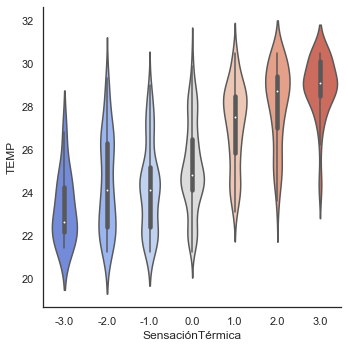

In [105]:
sns.catplot(x="SensaciónTérmica", y="TEMP",
            data=datos_sincar, kind="violin",
            palette=sns.color_palette("coolwarm", 7))

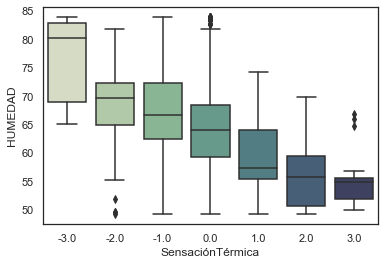

In [106]:
sns.boxplot(x="SensaciónTérmica", y="HUMEDAD", data=datos_sincar,
           palette=sns.cubehelix_palette(8, start=.5, rot=-.75))

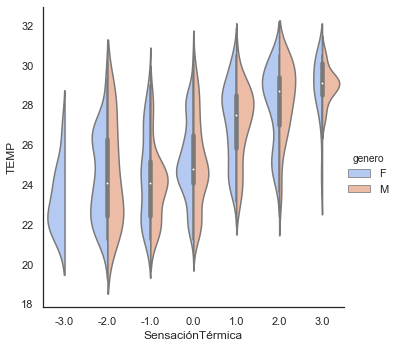

In [107]:
sns.catplot(x="SensaciónTérmica", y="TEMP", hue="genero",
            kind="violin", split=True, palette=sns.color_palette("coolwarm", 2),
            data=datos_sincar)

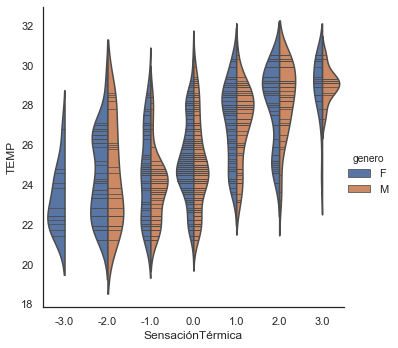

In [108]:
sns.catplot(x="SensaciónTérmica", y="TEMP", hue="genero",
            kind="violin", inner="stick", split=True, data=datos_sincar)

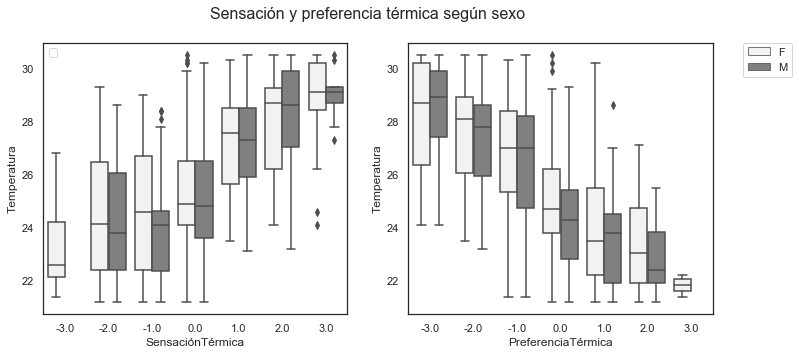

In [148]:
fig_1 = plt.figure(1, figsize=(12,5))

#configuro base del gráfico con sus respectivas variaciones:
chart_1 = fig_1.add_subplot(121) #1 (significa una línea), 2 (#columnas), 1(en cuál columna va) 
plt.xlabel("Sensación Térmica")

#Datos q se plotean dentro de ese gráfico
chart_1 = sns.boxplot(x="SensaciónTérmica", y="TEMP",
                      hue="genero", color="gray",
                      data=datos_sincar)
plt.legend('')   #esto es para q no aparezca leyenda en gráfico de la izquierda
plt.ylabel("Temperatura")

#palette="coolwarm"

chart_2 = fig_1.add_subplot(122)
plt.xlabel("Preferencia Térmica")
          
chart_2 = sns.boxplot(x="PreferenciaTérmica", y="TEMP",
                      hue="genero", color="gray",
                      data=datos_sincar)
plt.ylabel("Temperatura")

plt.suptitle("Sensación y preferencia térmica según sexo", fontsize=16)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

# *Análisis*

* *Puede ser muy confuso y los gráficos de líneas de abajo solo con valores promedios sería más claro*

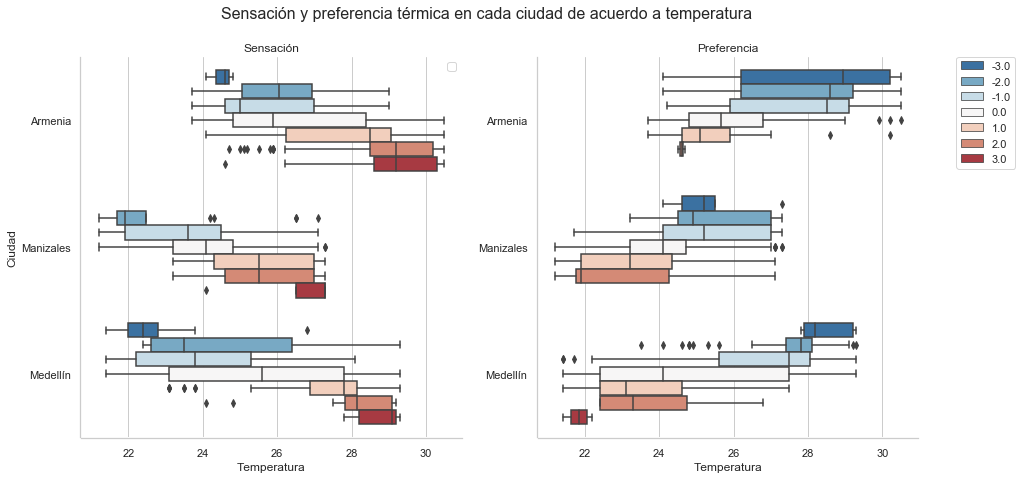

In [153]:
sns.set(style="whitegrid")

fig_1 = plt.figure(1, figsize=(15,7))

#configuro base del gráfico con sus respectivas variaciones:
chart_1 = fig_1.add_subplot(121) #1 (significa una línea), 2 (#columnas), 1(en cuál columna va) 
plt.xlabel("Sensación Térmica")

#Datos q se plotean dentro de ese gráfico
chart_1 = sns.boxplot(y="Ciudad", x="TEMP",
            hue="SensaciónTérmica", palette="RdBu_r",
            data=datos_sincar[["Ciudad","TEMP","SensaciónTérmica"]].dropna())
plt.legend('')   #esto es para q no aparezca leyenda en gráfico de la izquierda
plt.xlabel("Temperatura")
plt.title("Sensación", fontsize=12)

chart_2 = fig_1.add_subplot(122)       
chart_2 = sns.boxplot(y="Ciudad", x="TEMP",
            hue="PreferenciaTérmica", palette="RdBu_r",
            data=datos_sincar[["Ciudad","TEMP","PreferenciaTérmica"]].dropna())
plt.ylabel(" ")
plt.xlabel("Temperatura")
plt.title("Preferencia", fontsize=12)

sns.despine(offset=1, trim=False)
plt.suptitle("Sensación y preferencia térmica en cada ciudad de acuerdo a temperatura", fontsize=16)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

# Plotear al reves
...Tanto horizontal como vertical (siguiente) la información es confusa... opto por no mostrarla en el artículo

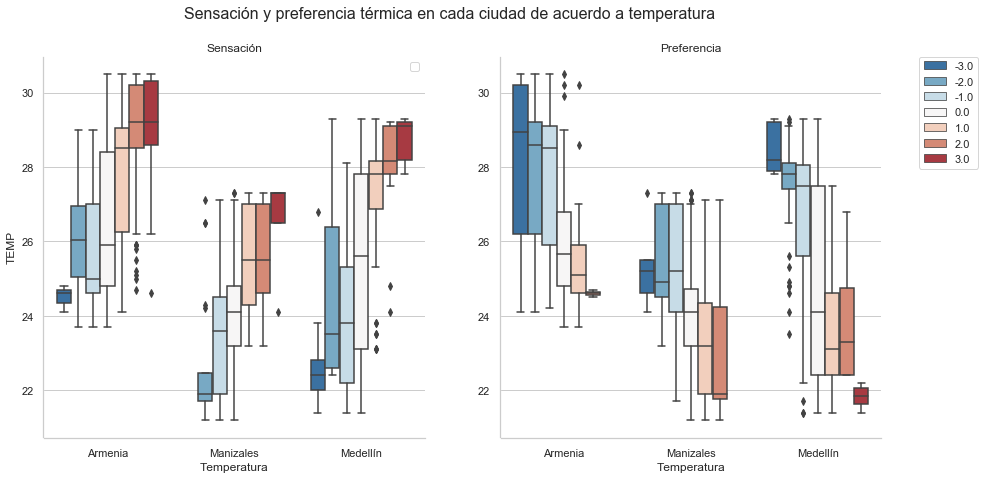

In [88]:
sns.set(style="whitegrid")

fig_1 = plt.figure(1, figsize=(15,7))

#configuro base del gráfico con sus respectivas variaciones:
chart_1 = fig_1.add_subplot(121) #1 (significa una línea), 2 (#columnas), 1(en cuál columna va) 
plt.xlabel("Sensación Térmica")

#Datos q se plotean dentro de ese gráfico
chart_1 = sns.boxplot(y="TEMP", x="Ciudad", 
            hue="SensaciónTérmica", palette="RdBu_r",
            data=datos_sincar[["Ciudad","TEMP","SensaciónTérmica"]].dropna())
plt.legend('')   #esto es para q no aparezca leyenda en gráfico de la izquierda
plt.xlabel("Temperatura")
plt.title("Sensación", fontsize=12)

chart_2 = fig_1.add_subplot(122)       
chart_2 = sns.boxplot(y="TEMP", x="Ciudad", 
            hue="PreferenciaTérmica", palette="RdBu_r",
            data=datos_sincar[["Ciudad","TEMP","PreferenciaTérmica"]].dropna())
plt.ylabel(" ")
plt.xlabel("Temperatura")
plt.title("Preferencia", fontsize=12)

sns.despine(offset=1, trim=False)
plt.suptitle("Sensación y preferencia térmica en cada ciudad de acuerdo a temperatura", fontsize=16)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

In [96]:
#Creando DF para hombres
datos_m_sincar = datos_sincar.loc[datos_sincar["genero"]=="M"]
datos_m_sincar.info()

#Creando DF para mujeres
datos_f_sincar = datos_sincar.loc[datos_sincar["genero"]=="F"]
datos_f_sincar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 4 to 1141
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ciudad              430 non-null    object 
 1   genero              430 non-null    object 
 2   edad                430 non-null    float64
 3   SensaciónVisual     430 non-null    float64
 4   SensaciónTérmica    430 non-null    float64
 5   PreferenciaVisual   430 non-null    float64
 6   PreferenciaTérmica  430 non-null    float64
 7   Rango_EH_media      430 non-null    float64
 8   Rango_EV_media      430 non-null    float64
 9   TEMP                430 non-null    float64
 10  HUMEDAD             430 non-null    float64
dtypes: float64(9), object(2)
memory usage: 40.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 1132
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  


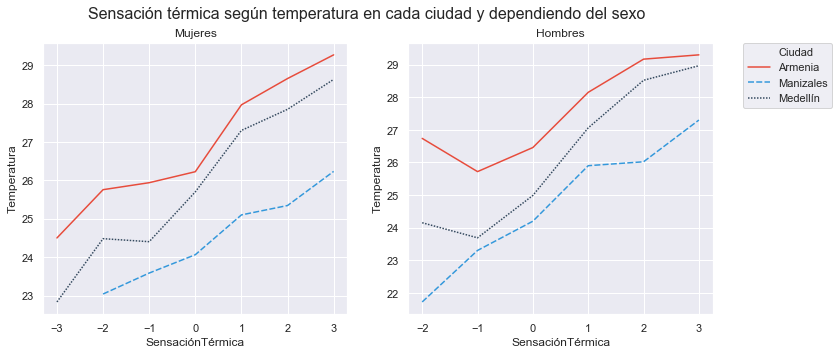

In [97]:
# Quiero plotear un gráfico al lado del otro para visualizar con más facilidad diferencias entre ambos

sns.set(style="darkgrid")
#colores de las series
flatui = ["#e74c3c", "#3498db", "#34495e"]

#Creo una figura dentro de la cual habrán varios gráficos
fig_1 = plt.figure(1, figsize=(12,5))

#configuro base del gráfico con sus respectivas variaciones:
chart_1 = fig_1.add_subplot(121) #1 (significa una línea), 2 (#columnas), 1(en cuál columna va) 
plt.title("Mujeres")
plt.xlabel("Sensación Térmica")

#Datos q se plotean dentro de ese gráfico
chart_1 = sns.lineplot(x="SensaciónTérmica", y="TEMP",
             hue="Ciudad", style="Ciudad", 
             palette=flatui, ci=None,
             data=datos_f_sincar, legend=False)
plt.ylabel("Temperatura")


chart_2 = fig_1.add_subplot(122)
plt.title("Hombres")
plt.xlabel("Sensación Térmica")
          
chart_2 = sns.lineplot(x="SensaciónTérmica", y="TEMP",
             hue="Ciudad", style="Ciudad", 
             palette=flatui, ci=None,
             data=datos_m_sincar)
plt.ylabel("Temperatura")

plt.suptitle("Sensación térmica según temperatura en cada ciudad y dependiendo del sexo", fontsize=16)

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

# Votos de Preferencia

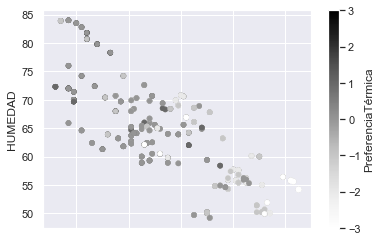

In [157]:
datos_sincar.plot.scatter(x='TEMP', y='HUMEDAD', c="PreferenciaTérmica")

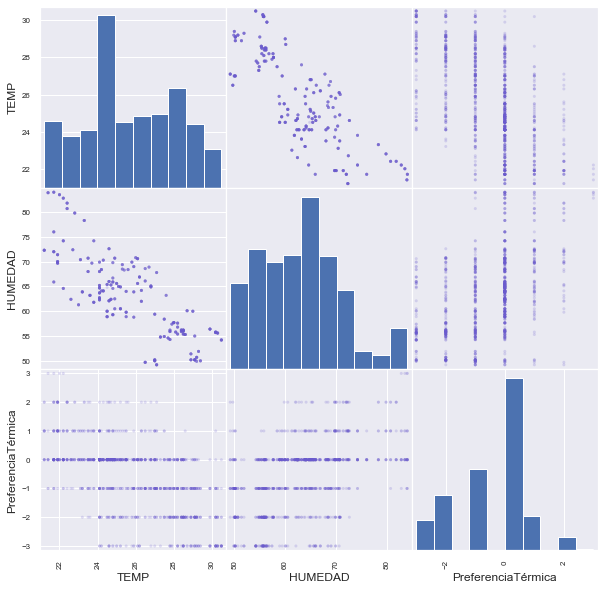

In [158]:
scatter_matrix(datos_sincar[['TEMP','HUMEDAD','PreferenciaTérmica']],
               alpha=0.2, figsize=(10,10), diagonal='hist', color="slateblue");

In [106]:
#Creando DF para preferencia térmica de hombres
datos_m_pref_sincar = datos_sincar.loc[datos_sincar["genero"]=="M"]
datos_m_pref_sincar.info()

#Creando DF para preferencia térmica de mujeres
datos_f_pref_sincar = datos_sincar.loc[datos_sincar["genero"]=="F"]
datos_f_pref_sincar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 4 to 1141
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ciudad              430 non-null    object 
 1   genero              430 non-null    object 
 2   edad                430 non-null    float64
 3   SensaciónVisual     430 non-null    float64
 4   SensaciónTérmica    430 non-null    float64
 5   PreferenciaVisual   430 non-null    float64
 6   PreferenciaTérmica  430 non-null    float64
 7   Rango_EH_media      430 non-null    float64
 8   Rango_EV_media      430 non-null    float64
 9   TEMP                430 non-null    float64
 10  HUMEDAD             430 non-null    float64
dtypes: float64(9), object(2)
memory usage: 40.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 1132
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  


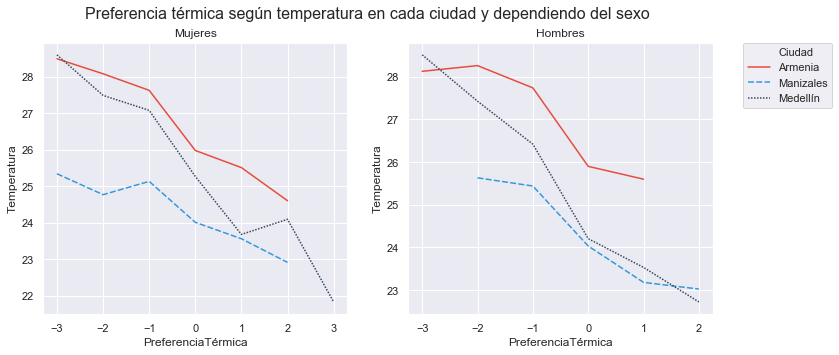

In [107]:
# Quiero plotear un gráfico al lado del otro para visualizar con más facilidad diferencias entre ambos

sns.set(style="darkgrid")
#colores de las series
flatui = ["#e74c3c", "#3498db", "#34495e"]

#Creo una figura dentro de la cual habrán varios gráficos
fig_1 = plt.figure(1, figsize=(12,5))

#configuro base del gráfico con sus respectivas variaciones:
chart_1 = fig_1.add_subplot(121) #1 (significa una línea), 2 (#columnas), 1(en cuál columna va) 
plt.title("Mujeres")
plt.xlabel("Preferencia Térmica")

#Datos q se plotean dentro de ese gráfico
chart_1 = sns.lineplot(x="PreferenciaTérmica", y="TEMP",
             hue="Ciudad", style="Ciudad", 
             palette=flatui, ci=None,
             data=datos_f_pref_sincar, legend=False)
plt.ylabel("Temperatura")


chart_2 = fig_1.add_subplot(122)
plt.title("Hombres")
plt.xlabel("Preferencia Térmica")
          
chart_2 = sns.lineplot(x="PreferenciaTérmica", y="TEMP",
             hue="Ciudad", style="Ciudad", 
             palette=flatui, ci=None,
             data=datos_m_pref_sincar)

plt.ylabel("Temperatura")

plt.suptitle("Preferencia térmica según temperatura en cada ciudad y dependiendo del sexo", fontsize=16)

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

# Tareas:
1). Encontrar qué está pasando con datos de sensación +3 en Manizales

2). Escribir análisis de lo q encuentro en dichos gráficos + exportar imágenes con buena calidad + llevarse textos para artículo

4). Jugar con Style your Pandas DFs
https://towardsdatascience.com/style-your-pandas-dataframes-814e6a078c6d

# Repetir gráficos de bolitas con "datos_sincar"